In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

FIGSIZE = (14, 7)

EG_DATE = '2018-05-08T12'

In [ ]:
xr.__version__

'0.18.2'

In [ ]:
def create_psuedo_data(ntime=5, nlat=10, nlon=10):
    data = 283 + 5 * np.random.rand(ntime, nlat, nlon)
    array = xr.DataArray(
            data,
            coords={
                'time': pd.date_range('2021-01-01', periods=ntime),
                'latitude': np.linspace(10, 30, nlat),
                'longitude': np.linspace(-100, -80, nlon, endpoint=False)
            },
            dims=['time', 'latitude', 'longitude'])
    array.attrs['units'] = 'kelvin'
    array.attrs['standard_name'] = 'air_temperature'
    array['latitude'].attrs['units'] = 'degrees_north'
    array['longitude'].attrs['units'] = 'degrees_east'
    return array
    # array.to_netcdf("some_file.nc")

In [ ]:
def load_erai_temp_dataset():
    remote_dataset = xr.open_dataset('http://thredds.atmos.albany.edu:8080/thredds/dodsC/ERA-Interim/2018/tsfc.2018.nc')
    return remote_dataset


def load_cfsr_temp_data():
    remote_dataset = xr.open_dataset('http://thredds.atmos.albany.edu:8080/thredds/dodsC/CFSR/2018/tsfc.2018.0p5.anl.nc')
    data_array = remote_dataset.tsfc.sel(time=EG_DATE, method='nearest').load()
    return data_array

In [ ]:
erai_dataset = load_erai_temp_dataset()
erai_dataset.info()

xarray.Dataset {
dimensions:
	lat = 256 ;
	lon = 512 ;
	time = 1460 ;

variables:
	datetime64[ns] time(time) ;
		time:actual_range = [1910952. 1919706.] ;
		time:last_time = 2018-12-31 18:00:00 ;
		time:first_time = 2018-1-1 00:00:00 ;
		time:delta_t = 0000-00-00 06:00:00 ;
		time:long_name = initial time ;
		time:_ChunkSizes = 1 ;
	float32 lat(lat) ;
		lat:Di = 0.7031252 ;
		lat:gridType = Gaussian Latitude/Longitude Grid ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:_ChunkSizes = 256 ;
	float32 lon(lon) ;
		lon:Di = 0.7031252 ;
		lon:gridType = Gaussian Latitude/Longitude Grid ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:_ChunkSizes = 512 ;
	float32 tsfc(time, lat, lon) ;
		tsfc:units = K ;
		tsfc:long_name = 2 metre temperature ;
		tsfc:level_type = single level variable ;
		tsfc:_ChunkSizes = [  1 256 512] ;

// global attributes:
	:description = tsfc as a single level variable ;
	:year = 2018 ;
	:source = http://rda.ucar.edu/datasets/ds62

## Dataset

- Xarray's `Dataset` is a dict-like container of labeled arrays (`DataArrays`) with aligned dimensions.  - It is designed as an in-memory representation of a netCDF dataset.
- In addition to the dict-like interface of the dataset itself, which can be used to access any `DataArray` in a `Dataset`. Datasets have the following key properties:
    

| Attribute   | Description   |
| ----------- |-----------  |
| `data_vars` | OrderedDict of `DataArray` objects corresponding to data variables.|
| `dims`      | dictionary mapping from dimension names to the fixed length of each dimension (e.g., {`lat`: 6, `lon`: 6, `time`: 8}).                   |
| `coords`    | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)|
| `attrs`     | OrderedDict to hold arbitrary metadata pertaining to the dataset. |

In [ ]:
erai_dataset.data_vars

Data variables:
    tsfc     (time, lat, lon) float32 ...

In [ ]:
erai_dataset.dims

Frozen(SortedKeysDict({'time': 1460, 'lat': 256, 'lon': 512}))

In [ ]:
erai_dataset.coords

Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

In [ ]:
erai_dataset.attrs

{'DODS_EXTRA.Unlimited_Dimension': 'time',
 'created_by': 'User: ab473731',
 'creation_date': 'Sun Apr  8 06:58:57 UTC 2018',
 'description': 'tsfc as a single level variable',
 'references': 'http://dx.doi.org/10.5065/D6CR5RD9',
 'source': 'http://rda.ucar.edu/datasets/ds627.0/',
 'year': 2018}

## DataArray

The DataArray is xarray's implementation of a labeled, multi-dimensional array. It has several key properties:


|Attribute | 	Description|
| ------- | ------------ |
|data | 	`numpy.ndarray` or `dask.array` holding the array's values.|
|dims | 	dimension names for each axis. For example:(`x`, `y`, `z`) (`lat`, `lon`, `time`).|
|coords | 	a dict-like container of arrays (coordinates) that label each poin (e .g ., 1-dimensional arrays of numbers, datetime objects or strings)|
|attrs | 	an `OrderedDict` to hold arbitrary attributes/metadata (such as units)|
|name | 	an arbitrary name of the array|


In [ ]:
erai_temp_array = erai_dataset.tsfc  # equivalent to  = erai_dataset['tsfc']

In [ ]:
print("\n dims:")
print(erai_temp_array.dims)
print("\n coords:")
print(erai_temp_array.coords)
print("\n attrs:")
print(erai_temp_array.attrs)
print("\n name:")
print(erai_temp_array.name)


 dims:
('time', 'lat', 'lon')

 coords:
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

 attrs:
{'units': 'K', 'long_name': '2 metre temperature', 'level_type': 'single level variable', '_ChunkSizes': array([  1, 256, 512], dtype=int32)}

 name:
tsfc


In [ ]:
print(erai_temp_array)

<xarray.DataArray 'tsfc' (time: 1460, lat: 256, lon: 512)>
[191365120 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]


# Coordinates vs dimensions
 - DataArray objects inside a Dataset may have any number of dimensions but are presumed to share a common coordinate system.
 - Coordinates can also have any number of dimensions but denote constant/independent quantities, unlike the varying/dependent quantities that belong in data.
 - A dimension is just a name of an axis, like "time"

# Indexing:

Indexing by integer location : 

`[:, 0]` or `isel`

In [ ]:
single_time_array = erai_temp_array.isel(time=0)
print(single_time_array)


single_time_array = erai_temp_array[0, :,:]
print(single_time_array)

<xarray.DataArray 'tsfc' (time: 4, lat: 256, lon: 512)>
[524288 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-01-02T18:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]
<xarray.DataArray 'tsfc' (lat: 256, lon: 512)>
[131072 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2018-01-01
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]


Indexing by "label" or coordinate:

`loc` or `sel`

In [ ]:
single_time_array = erai_temp_array.sel(time=slice('2018-05-08T12','2018-05-10T12'))
print(single_time_array, end="\n")
print()

single_time_array = erai_temp_array.sel(time=datetime(2018, 5, 8, 12))
print(single_time_array, end="\n")
print()

single_time_array = erai_temp_array.loc['2018-05-08T12', :, ]
print(single_time_array)
single_time_array = single_time_array.load()

<xarray.DataArray 'tsfc' (time: 9, lat: 256, lon: 512)>
[1179648 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-05-08T12:00:00 ... 2018-05-10T12:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]

<xarray.DataArray 'tsfc' (lat: 256, lon: 512)>
[131072 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
  * lat      (lat) float32 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]

<xarray.DataArray 'tsfc' (lat: 256, lon: 512)>
[131072 values with dtype=floa

In [ ]:
foco_lat, foco_lon = 40.59, 254.92

timeseries = erai_temp_array.sel(lat=foco_lat, lon=foco_lon)

In [ ]:
# http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html?highlight=sel
help(xr.DataArray.sel)

In [ ]:
timeseries = erai_temp_array.sel(lat=foco_lat, lon=foco_lon, method='nearest')
print(timeseries)

<xarray.DataArray 'tsfc' (time: 1460)>
array([263.89386, 260.533  , 261.27374, ..., 270.39313, 267.71375, 261.81662],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
    lat      float32 40.35
    lon      float32 255.2
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]


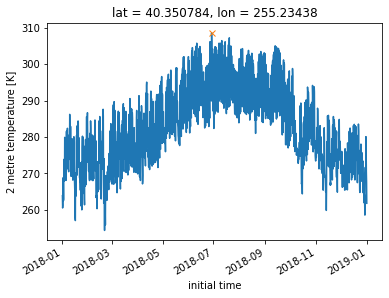

In [ ]:
max_temp = timeseries.max()
max_temp_date = timeseries.idxmax()

fig, ax = plt.subplots()
timeseries.plot(ax=ax)
ax.plot(max_temp_date, max_temp, 'x', lw=5)

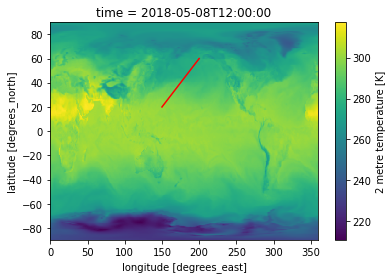

In [ ]:
# xarray is lazy by default.  For local data this is usually good, however sometimes calling `.load()` helps.  
# no real "rule" but when something is taking longer than it "should" trying forcing the load
single_time_array = erai_temp_array.sel(time='2018-05-08T12').load()

lat_points = np.linspace(20, 60)
lon_points = np.linspace(150, 200)
fig, ax = plt.subplots()
single_time_array.plot()
ax.plot(lon_points, lat_points, c='r')

<xarray.DataArray 'tsfc' (lat: 50, lon: 50)>
array([[300.0531 , 300.20935, 300.35583, ..., 296.96716, 297.04724,
        297.0531 ],
       [299.82654, 300.13123, 300.19177, ..., 296.7367 , 296.60388,
        296.46912],
       [299.79138, 299.9027 , 299.91443, ..., 296.28748, 296.1117 ,
        295.85974],
       ...,
       [274.2953 , 274.63904, 275.0492 , ..., 276.69763, 276.83044,
        276.94763],
       [275.5199 , 274.63123, 275.25232, ..., 275.93982, 275.69568,
        275.6449 ],
       [273.80896, 271.3578 , 271.88513, ..., 275.75623, 275.3617 ,
        274.81482]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
  * lat      (lat) float32 20.0 20.7 21.4 22.11 23.51 ... 57.89 58.6 59.3 60.0
  * lon      (lon) float32 149.8 151.2 151.9 153.3 ... 196.9 198.3 199.0 199.7
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_type:   single level variable
    _ChunkSizes:  [  1 256 512]


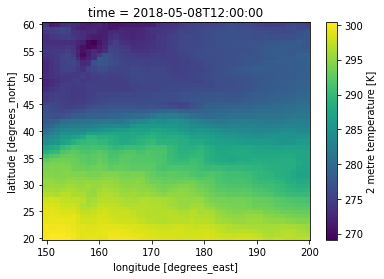

In [ ]:
cross_section = single_time_array.sel(lat=lat_points, lon=lon_points, method="nearest")
print(cross_section)
cross_section.plot()

<xarray.DataArray 'tsfc' (points: 50)>
array([300.0531 , 300.13123, 299.91443, 299.65466, 299.26794, 299.10974,
       298.08044, 297.06287, 296.31873, 296.23474, 296.40076, 296.33044,
       295.78748, 295.20154, 294.29724, 293.87146, 292.6527 , 292.141  ,
       291.93982, 291.93005, 291.66638, 291.17224, 289.06677, 288.2738 ,
       287.64294, 286.0453 , 284.98083, 283.2035 , 280.28943, 278.74646,
       278.41443, 278.1371 , 277.6742 , 277.2992 , 276.69763, 276.59607,
       276.766  , 276.97498, 277.4574 , 278.15662, 277.63904, 277.59802,
       277.87927, 278.07068, 277.97888, 277.68396, 276.81873, 276.69763,
       275.69568, 274.81482], dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
    lat      (points) float32 20.0 20.7 21.4 22.11 ... 57.89 58.6 59.3 60.0
    lon      (points) float32 149.8 151.2 151.9 153.3 ... 198.3 199.0 199.7
Dimensions without coordinates: points
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_

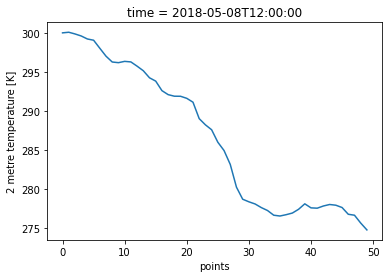

In [ ]:
# declare a common dimension, so x-array doesn't broadcast against each other.
lat_points = xr.DataArray(lat_points, dims="points")
lon_points = xr.DataArray(lon_points, dims="points")
cross_section = single_time_array.sel(lat=lat_points, lon=lon_points, method="nearest")
print(cross_section)
cross_section.plot()

## Interpolation

<xarray.DataArray 'tsfc' (points: 50)>
array([300.05308985, 300.05968843, 299.83509169, 299.61512207,
       299.37451814, 299.13901566, 298.06951297, 296.86495535,
       296.24505221, 296.23235716, 296.43593644, 296.44752395,
       295.86402132, 295.09802355, 294.25040346, 293.65452334,
       292.93316324, 292.25251607, 291.99214238, 291.91747934,
       291.48683694, 290.67181214, 289.48040528, 288.45000603,
       287.71647336, 286.07403687, 284.72332434, 282.83584847,
       280.84122466, 279.1169877 , 278.44140869, 278.13638003,
       277.58440423, 277.15538861, 276.81175067, 276.6530212 ,
       276.72807384, 276.99440149, 277.57814409, 278.07499493,
       277.91658996, 277.6900474 , 277.85182457, 278.0704693 ,
       277.89404713, 277.51720626, 277.10038535, 276.75570453,
       275.88189318, 274.84014179])
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
    lat      (points) float64 20.0 20.82 21.63 22.45 ... 57.55 58.37 59.18 60.0
    lon      (points) float6

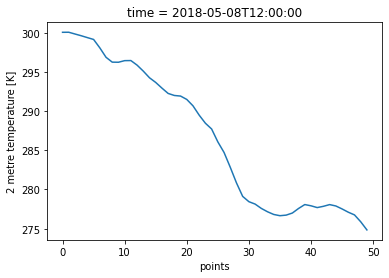

In [ ]:
lat_points = xr.DataArray(lat_points, dims="points")
lon_points = xr.DataArray(lon_points, dims="points")

cross_section = single_time_array.interp(lat=lat_points, lon=lon_points, method="linear")
print(cross_section)
cross_section.plot()

# Interpolation / indexing between grids of different coordinates

In [ ]:
#  remote_dataset = xr.open_dataset('http://thredds.atmos.albany.edu:8080/thredds/dodsC/CFSR/2018/tsfc.2018.0p5.anl.nc')
#  data_array = remote_dataset.tsfc.sel(time=EG_DATE, method='nearest').load()

cfsr_data = load_cfsr_temp_data()
print(cfsr_data)
print("-------------------")
print(single_time_array)

<xarray.DataArray 'tsfc' (lat: 361, lon: 720)>
array([[233.8  , 233.8  , 233.8  , ..., 233.8  , 233.8  , 233.8  ],
       [232.858, 232.882, 232.906, ..., 232.792, 232.812, 232.836],
       [232.286, 232.32 , 232.354, ..., 232.18 , 232.216, 232.252],
       ...,
       [265.034, 265.036, 265.04 , ..., 265.01 , 265.018, 265.026],
       [265.968, 265.972, 265.976, ..., 265.962, 265.964, 265.966],
       [267.866, 267.866, 267.866, ..., 267.866, 267.866, 267.866]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Attributes:
    units:      K
    long_name:  Temperature at Ground or water surface
-------------------
<xarray.DataArray 'tsfc' (lat: 256, lon: 512)>
array([[232.48082, 232.47496, 232.46715, ..., 232.473  , 232.47496,
        232.47887],
       [234.33043, 234.30699, 234.2816 , ..., 234.33

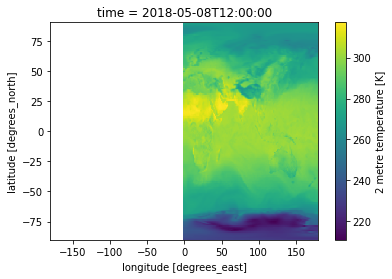

In [ ]:
erai_0p5_grid = single_time_array.reindex_like(cfsr_data, method='nearest', tolerance=0.5)
erai_0p5_grid.plot()

In [ ]:
# redefine CFSR longitude values to be 0-360 instead of -180:180
cfsr_data = load_cfsr_temp_data()
cfsr_data['lon'] = (cfsr_data['lon'] + 360) % 360  # convert -180:180 to 0-360 but values are out of order
cfsr_data = cfsr_data.sortby('lon')  # wrap whole grid so longitudes are sorted 0-360 instead of 180-360,0-180
print(cfsr_data)
# print( 520 % 500)

<xarray.DataArray 'tsfc' (lat: 361, lon: 720)>
array([[233.8  , 233.8  , 233.8  , ..., 233.8  , 233.8  , 233.8  ],
       [232.858, 232.882, 232.906, ..., 232.792, 232.812, 232.836],
       [232.286, 232.32 , 232.354, ..., 232.18 , 232.216, 232.252],
       ...,
       [265.034, 265.036, 265.04 , ..., 265.01 , 265.018, 265.026],
       [265.968, 265.972, 265.976, ..., 265.962, 265.964, 265.966],
       [267.866, 267.866, 267.866, ..., 267.866, 267.866, 267.866]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 180.0 180.5 181.0 181.5 ... 178.0 178.5 179.0 179.5
Attributes:
    units:      K
    long_name:  Temperature at Ground or water surface


ValueError: ignored

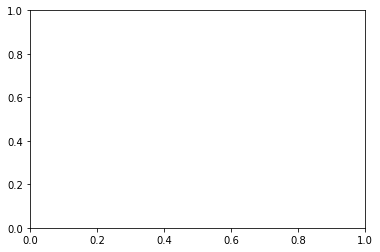

In [ ]:
erai_0p5_grid = single_time_array.reindex_like(cfsr_data, method='nearest', tolerance=0.5)
erai_0p5_grid.plot()
plt.show()
single_time_array.plot()
plt.show()

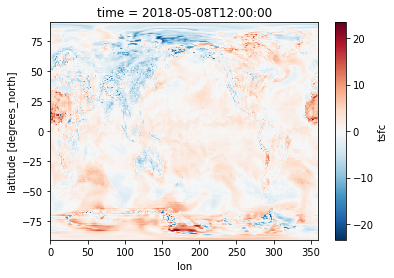

In [ ]:
(cfsr_data-erai_0p5_grid).plot()

<xarray.DataArray 'tsfc' (lat: 361, lon: 720)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [233.71099275, 233.69851234, 233.68520727, ..., 233.7117145 ,
        233.71163382,          nan],
       ...,
       [269.40074392, 269.40443239, 269.40839703, ..., 269.40572871,
        269.403794  ,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    time     datetime64[ns] 2018-05-08T12:00:00
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    units:        K
    long_name:    2 metre temperature
    level_t

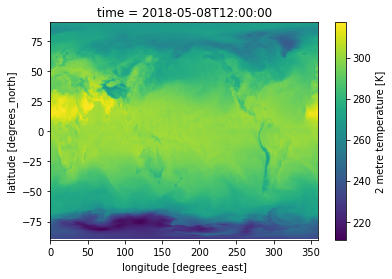

In [ ]:
erai_0p5_interped = single_time_array.interp_like(cfsr_data, method='linear',)
print(erai_0p5_interped)
erai_0p5_interped.plot()
plt.show()

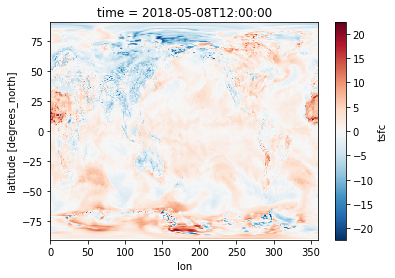

In [ ]:
(cfsr_data-erai_0p5_interped).plot()

Bi-Linear interpolation vs nearest neighbour

In [ ]:
(erai_0p5_interped - erai_0p5_grid).plot()

# Array operators

In [ ]:
print(single_time_array.max())
print("")
print(f"{single_time_array.max().item():3.2f}")
print("")
print(single_time_array.min())
print("")
print(f"{single_time_array.min().item():3.2f}")

# Broadcasting

In [ ]:
latitudinal_mean = single_time_array.mean(dim='lon')
latitudinal_mean.plot()

In [ ]:
anomaly_from_latmean = single_time_array - latitudinal_mean # 1d array of lats broadcast against 2 d array (lat x lon) 
anomaly_from_latmean.plot()